# NOT1-Cvičenia

pre testovanie optimalizačných techník vybraná vybraná Eggholderova funkcia

In [2]:
import math

def eggholder(x,y):
    return (-(y+47)*math.sin(math.sqrt(abs(x/2+(y+47)))))-(x*math.sin(math.sqrt(abs(x-(y+47)))))

print(eggholder(512,404.2319))

-959.6406627106155


enumerovanie hodnôt na oboore <-512,512> +  vykreslenie surface grafu

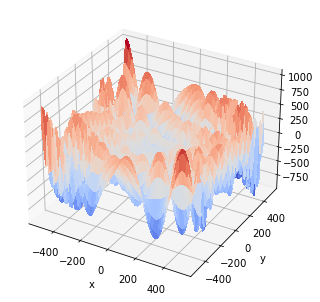

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

X = np.arange(-512, 512,0.2)
Y = np.arange(-512, 512,0.2)

Z = np.array([[eggholder(x,y) for x in X] for y in Y])
X, Y = np.meshgrid(X, Y)


fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

nájdenie minima v enumerovaných hodnotách

In [4]:

minimum = float("inf")
for z in Z.flatten():
    if minimum > z:
        minimum = z

print('f(x,y)=' + str(minimum))


f(x,y)=-958.953852727381


nájdenie honôt x a y pre ktoré funkcia nadobúda minimálnu hodnotu

In [5]:
pos = np.where(Z==minimum)
print("x=" + str(X[0][pos[0][0]]),"y=" + str(Y[0][pos[1][0]]))

x=403.99999999994793 y=-512.0


priprava gen.alg

In [47]:
import random
import bitstring
import itertools
import math


gencount = 0
inf = float("inf")

def eggholder(x,y):
    return (-(y+47)*math.sin(math.sqrt(abs(x/2+(y+47)))))-(x*math.sin(math.sqrt(abs(x-(y+47)))))

def firstgen(length):
    population = []
    gencount = 1
    for x in range(length):
        individual = []
        individual.append(random.random()*1024.0 - 512.0)
        individual.append(random.random()*1024.0 - 512.0)
    evaluate(population)
    return population

def generate(numiterations,poplength=1500):
    pop = firstgen(poplength)
    for i in range(numiterations-1):
        pop = nextgen(pop)
        evaluate(pop)
    
        



def fitness(individual):
    if abs(individual[0])>512 or abs(individual[1])>512:
        return inf
    return eggholder(individual[0],individual[1])

# mutacia, flipneme jeden bit v jednincovi s pravdepodobnostou mutRate
def mutuate(individual, mutRate=0.0001):
    retval = individual
    if random.random() < mutRate:
        idx = random.randrange(127) # nahodne cele cislo od 0 do 127(pozicia v dvoch float cislach - obe po 64 bitov)
        if idx>63:
            retval[1] = bitflip(retval[1],idx-64)
        else:
            retval[0] = bitflip(retval[0],idx)        
    return retval


#  krizenie na nahodnej pozicii, vratime deti
def cross(parent1,parent2):
    child1, child2 = parent1,parent2
    idx = random.randrange(127)
    if idx>63:
        child1[1],child2[1] = crossone(child1[1],child2[1],idx-64)
    else:
        child1[0],child2[0] = crossone(child1[0],child2[0],idx)
        child1[1],child2[1] = child2[1],child1[1] # y hodnoty len vymenim
    return child1,child2


def selection(population):
    newpop = []
    for pair in itertools.combinations(population,2):
        if not fitness(pair[0]) == inf:
            if not fitness(pair[1]) == inf:
                if fitness(pair[0]) < fitness(pair[1]):
                    newpop.append(cross(pair[0],pair[1]))
    return newpop

def nextgen(population):
    nextpop = selection(population)
    for i in range(len(nextpop)):
        nextpop[i] = mutate(nextpop[i])
    gencount = gencount + 1 
    return nextpop
        
def evaluate(population):
    fit =[fitness(p) for p in population]
    minimum = inf
    fitsum = 0
    goodcount = 0
    for f in fit:
        if not f == inf:
            fitsum = fitsum + f
            goodcount = goodcount + 1
            if f < minimum:
                minimum = f
        
    mean = fitsum/goodcount
    
    print('---------------------------------------------------------------------------')
    print('Generacia: ' + gencount)
    print('pocet jedincov: ' + len(population))
    print('priemerny fitness: ' + mean)
    print('najmensi fitness: ' + minimum)
    print('---------------------------------------------------------------------------')

    
    
    return mean,minimum

    

# pomocna funkcia na flipnutie jednho bitu vo float-e
def bitflip(x,pos):
    bits = bitstring.BitArray(float=x,lengt=64)
    bits.invert(pos)
    return bits.float


# pomocna funkcia na cross v ramci jedneho floatu
def crossone(x,y,pos):
    bitsx = bitstring.BitArray(float=x,lengt=64)
    bitsy = bitstring.BitArray(float=y,lengt=64)
    tempx = bitsx[:pos]
    tempy = bitsy[:pos]
    tempx.append(bitsy[pos:])
    tempy.append(bitsx[pos:])
    return tempx.float,tempy.float


generate(10)

[False]
